In [1]:
import numpy
import matplotlib.pyplot as plt

# Least squares regression (in 1D) using Python

## Create some data which will fit polynomials $f(x)$ to

First we create array of x coordinates

In [6]:
x_start = 0.0
x_end = 2.0;
numpoints = 10
dx = (x_end - x_start)/float(numpoints - 1)

x = numpy.zeros(numpoints)
for i in range(numpoints):
    x[i] = x_start + i * dx

and evaluate a known function at each `x[i]`.

We will choose
$$
y(x) = 1 + x + 3.01 x^2 + n(x),
$$
where $n(x)$ is some random noise.

In [9]:
y = 1.0 + x + 3.01 * x**2

In [11]:
numpy.random.seed(0)

noise = numpy.random.random(numpoints) * 4.0

y += noise

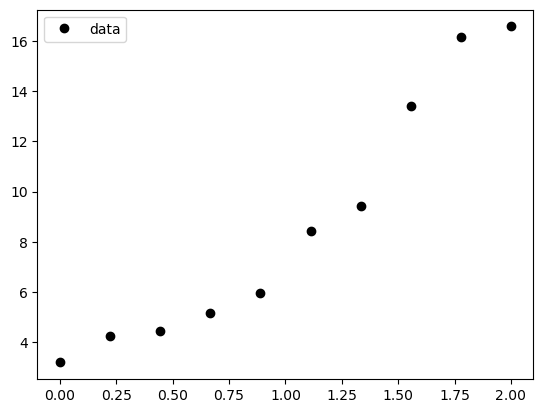

In [13]:
plt.plot(x, y, 'ok', label='data')
plt.legend(loc='best');

We will create a fine sampling of coordinates to evaluate our fit functions $f(x)$ on. These are referred to as the evaluation points.

In [15]:
numpoints_eval = 128
dx_eval = (x_end - x_start)/float(numpoints_eval - 1)

x_eval = numpy.zeros(numpoints_eval)
for i in range(numpoints_eval):
    x_eval[i] = x_start + i * dx_eval

---



To perform polynomial regression we will use the following package

In [20]:
import numpy.polynomial as poly

and from this we will use `poly.Polynomial.fit`.

---

## Linear regression



We wish to fit our data to $f(x) = a_0 + a_1 x$.
Here $f(x)$ is a linear polynomial, or rather a _degree_ 1 polynomial.
`poly.Polynomial.fit()` requires we provided the polynomial degree.

In [25]:
degree = 1
f_1 = poly.Polynomial.fit(x, y, degree)

In [27]:
print(f_1)

8.69936143 + 7.19414895·x


In [29]:
print(type(f_1))

<class 'numpy.polynomial.polynomial.Polynomial'>


To get the coefficients $a_0, a_1$ we do this

In [32]:
a = f_1.coef

In [34]:
print('coefficients a', a)

coefficients a [8.69936143 7.19414895]


We can treat `f_1` like a Python function and evaluate it at $x$ values.
We evaluate `f_1()` on our evaluation points.

In [37]:
f_1_eval = f_1(x_eval)

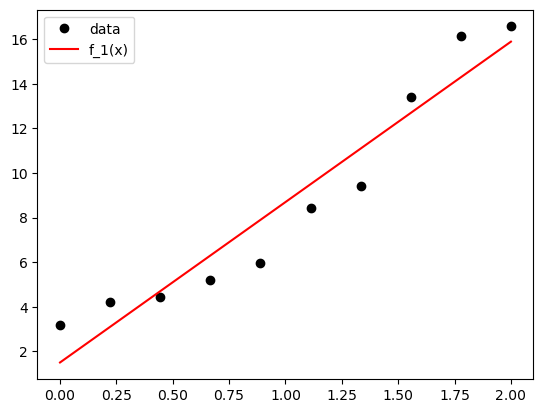

In [39]:
plt.plot(x, y, 'ok', label='data')
plt.plot(x_eval, f_1_eval, '-r', label='f_1(x)')
plt.legend(loc='best');

---

## Quadratic regression

Using $f(x) = a_0 + a_1 x + a_2 x^2$ as our fitting function is a degree 2 polynomial.
We can fit this function using `poly.Polynomial.fit()` as well.

We just change `degree = 1` to `degree = 2`.

In [41]:
degree = 2
f_2 = poly.Polynomial.fit(x, y, degree)

We print the coefficients again. Note that for degree 2 polynomials there are three coeffients $(a_0, a_1, a_2)$.

In [45]:
a = f_2.coef
print('coefficients a', a)

coefficients a [7.44417874 7.19414895 3.08090298]


In [47]:
f_2_eval = f_2(x_eval)

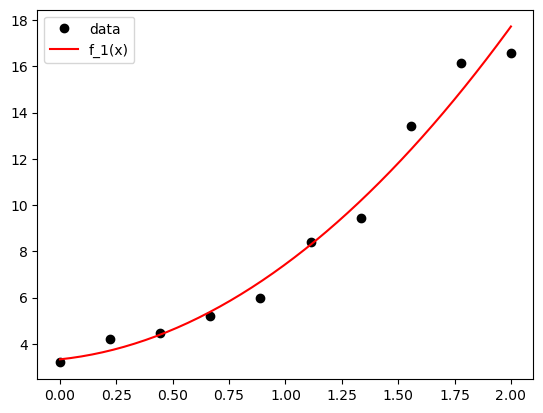

In [49]:
plt.plot(x, y, 'ok', label='data')
plt.plot(x_eval, f_2_eval, '-r', label='f_1(x)')
plt.legend(loc='best');

---

## Least squares regression with general functions $f(x)$.

If you wish to perform least squares regression with a general function which is not a polynomial, you can use the function from `scipy.optimize` called `curve_fit`. Let's import that

In [53]:
from scipy.optimize import curve_fit

Now we define a Python function which evaluates our general $f(x)$. 
For illustration we will use a quadratic function just to illustate that `curve_fit` produces the same results as `Polynomial.fit`.

In [55]:
def general_func(x, a0, a1, a2):
    return a0 + a1 * x  + a2 * x**2

They we call `curve_fit()`, providing it out $f(x)$ (which is called `general_func()` and our `x` and `y` data.

In [57]:
popt, pcov = curve_fit(general_func, x, y)

`popt` contains our coefficients `a0`, `a1` and `a2`.

In [62]:
print(popt)

[3.33093289 1.03234263 3.08090316]


As before, we wish to plot our fitted function so we evaluate $f(x)$ on our sample points.

In [65]:
f_gen_eval = general_func(x_eval, popt[0], popt[1], popt[2])

And then plot the $f(x)$, along with our x data and y data to see how good the fit actually is, and to be able to compare it with what `Polynomial.fit` gave us.

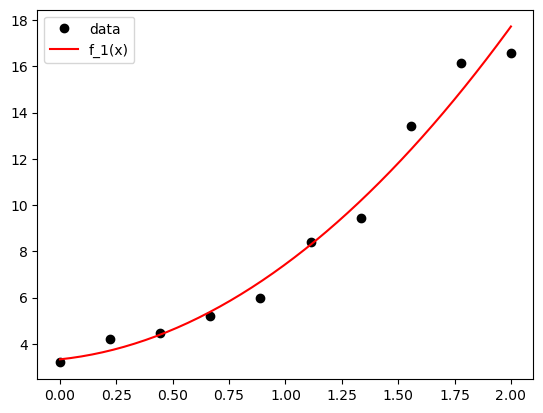

In [68]:
plt.plot(x, y, 'ok', label='data')
plt.plot(x_eval, f_gen_eval, '-r', label='f_1(x)')
plt.legend(loc='best');

Visual inspection reveals the curve obainted is the same (or very very similar).

For fun, we compute the difference on our evaluation points between what we got with `Polynomial.fit` and `curve_fit`.

In [72]:
diff = f_gen_eval - f_2_eval

In [74]:
numpy.max(numpy.absolute(diff))

1.310965460632474e-07

Okay, they are not idential but the largest difference is $O(10^{-7}$. 
We may have suspected they are not identical given the coefficients obtained for `a0`, `a1` and `a2` were slightly different.
The difference in coefficients computed is due the the fact that `curve_fit` uses a different solver to compute the coefficients. `Polynomial.fit` uses an exact solver whilst `curve_fit` uses an iterative solver which does not provide _exact_ answers.